In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

from lbg_survey_metrics.completeness import _completeness_meta, _completeness_data
from lbg_survey_metrics.constants import double_col, cmaps, colors

from lbg_survey_metrics.galaxy_distribution import redshift_distribution

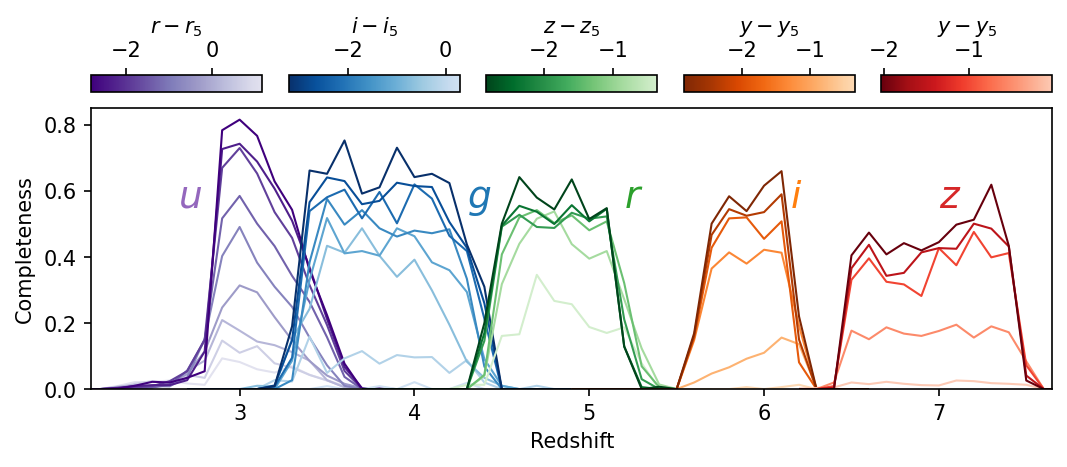

In [2]:
fig, ax = plt.subplots(figsize=double_col, constrained_layout=True, dpi=150)

# Set axis properties
ax.set(
    xlim=(2.15, 7.65),
    ylim=(0, 0.85),
    xlabel="Redshift",
    ylabel="Completeness"
)

# Determine colorbar positions
N = 5
xmin, xmax = ax.get_xlim()
sep = 0.15
wid = ((xmax - xmin) - (N-1) * sep) / N
xstart = [i * (wid + sep) + xmin for i in range(N)]
cbar_pos = [
    [xs, 0.9, wid, 0.05]
    for xs in xstart
]

for i, (drop_band, det_band) in enumerate(zip("ugriz", "rizyy")):
    # Get completeness data
    C = _completeness_data[drop_band]

    # Set range for colors
    vrange = C.columns.max() - C.columns.min()
    vmin = C.columns.min()
    vmax = vmin + 1.25 * vrange
    
    # Create LineCollection of completeness values
    segments = []
    for col in C.columns:
        segments.append(np.column_stack([C.index, C[col]]))
    lc = LineCollection(
        segments[::-1],
        array=C.columns[::-1],
        cmap=cmaps[drop_band]+"_r",
        norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax),
        lw=1,
    )
    ax.add_collection(lc)

    cax = ax.inset_axes(cbar_pos[i], transform=ax.transData)
    cb = fig.colorbar(lc, shrink=0.2, cax=cax, orientation="horizontal", label=f"${det_band} - {det_band}_5$")
    cb.ax.xaxis.set_ticks_position("top")
    cb.ax.xaxis.set_label_position("top")
    cb.ax.set_xlim(C.columns.min(), C.columns.max())

# Plot band labels
plt.text(2.65, 0.55, "$u$", fontsize=18, color=colors["u"])
plt.text(4.3, 0.55, "$g$", fontsize=18, color=colors["g"])
plt.text(5.2, 0.55, "$r$", fontsize=18, color=colors["r"])
plt.text(6.15, 0.55, "$i$", fontsize=18, color=colors["i"])
plt.text(7, 0.55, "$z$", fontsize=18, color=colors["z"])

fig.savefig("../figures/completeness.pdf")